# <center>Building Simple Neural Network with Only Two Neurons and Hidden Layers (Exponential Linear Unit)</center>

## Introduction

In this lab, we will build a neural network from scratch and code how it performs predictions using forward propagation. After doing forward propagation, we are going to use backpropagation. Exponential Linear Unit, or Exponential Linear Unit (ELU), is a function that tends to converge to zero faster and produce more accurate results. Unlike other activation functions, the ELU takes an extra alpha constant, which must be a positive number. ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly.

<img src="https://miro.medium.com/max/1400/1*brjVu216FGlkqcOjPXijmw.png" width="1000" alt="ELU">


<br>

We will iteratively repeate the following steps in our code:

**1-**Calculate network output using forward propagation.

**2-**Calculate error between ground truth and estimated output.

**3-**Ipdate weights and biases throught back propagation.

**4-**Repeate the above three steps until number of iterations is reached or error between ground truth (T) and predicted output (a<sub>2</sub>) is below a predefined threshold.


Please note that all deep learning libraries have the entire training and prediction processes implemented.


### Importing Libraries

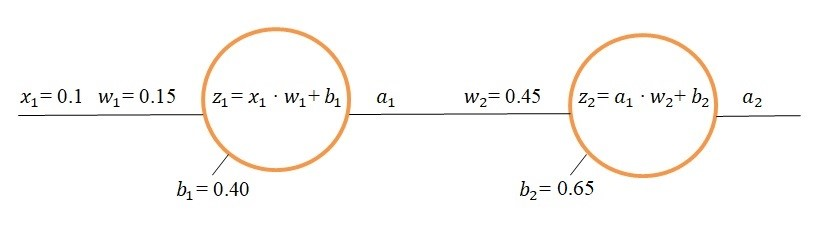

In [1]:
import numpy as np
from IPython.display import Image
Image(filename='image_folder/back_prop_.jpg', width=900)

### Creating parameters

In [2]:
weights = [0.15, 0.45]
biases = [0.40, 0.65]
T = 0.25
lr = 0.4
threshold = 0.001
epochs = 300

Let's print the weights and biases

In [3]:
print(weights)
print(biases)

[0.15, 0.45]
[0.4, 0.65]


### Building ELU Function for the Neural Network

#### ELU function:

<img src="image_folder/elu.png" width=20% height=20% alt="ELU">

<br>

In [4]:
def elu(alpha, z):
    if z > 0:
        return z
    else:
        return alpha * (np.exp(z) - 1)

#### Derivative of the ELU function:

<img src="image_folder/elu_d.png" width=15% height=15% alt="ELU_d">

In [5]:
def elu_prime(z, alpha):
    if z > 0:
        return 1
    else:
        return alpha * np.exp(z)

### Weights

In [6]:
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2


w₁: 0.15
w₂: 0.45


### Biases

In [7]:
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2


b₁: 0.4
b₂: 0.65


Now that we have the weights and the biases defined for the network, let's compute the output for a given input x<sub>1</sub>.

In [8]:
x_1 = 0.1
print(f"Input of our network: {x_1}")

Input of our network: 0.1


### Calculate a<sub>2</sub> and  Error

Let's start by computing the wighted sum of the input, z<sub>1</sub> at the first node of the hidden layer.

In [9]:
z_1 = x_1 * weights[0] + biases[0]

print('The weighted sum of the input at the first node in the first hidden layer is {}'.format(z_1))

The weighted sum of the input at the first node in the first hidden layer is 0.41500000000000004


Using a ELU as the activation function.

In [10]:
a_1 = elu(1, z_1)
a_1

0.41500000000000004

Let's start computing the wighted sum of the input, z<sub>2</sub> at the first node of second hidden layer.

In [11]:
z_2 = a_1 * weights[1] + biases[1]

print('The weighted sum of the input at the first node in second hidden layer is {}'.format(z_2))

The weighted sum of the input at the first node in second hidden layer is 0.8367500000000001


In [12]:
a_2 = elu(1, z_2)
print(f'Model predicted or estimated as {a_2}')

Model predicted or estimated as 0.8367500000000001


Let's calculate error between predicted output (a<sub>2</sub>) and the ground truth (T)

In [13]:
E = 1 / 2 * (T - a_2) ** 2
E

0.17213778125000007

## Updating Weights and Biases

### Updating w<sub>2</sub>

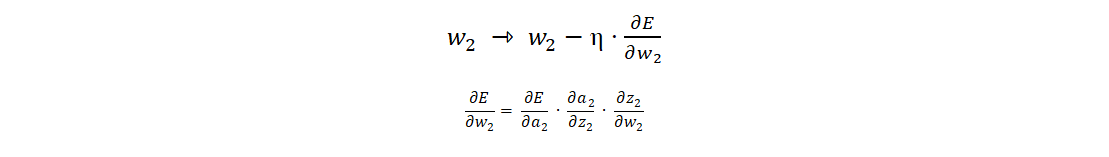

In [14]:
Image(filename='image_folder/update_w2.png')

In [15]:
weights[1] = weights[1] - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1

print(f'Updated w\u2082 value is {weights[1]}')

Updated w₂ value is 0.35259949999999995


### Updating b<sub>2</sub>

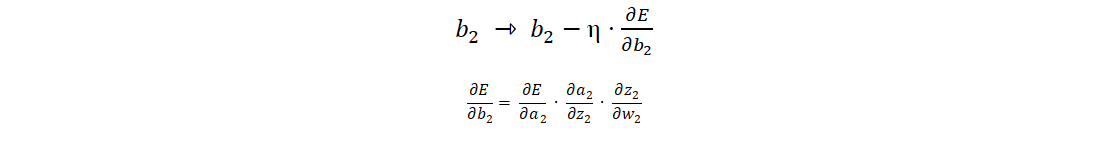

In [16]:
Image(filename='image_folder/update_b2.png')

In [17]:
biases[1] = biases[1] - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1

print(f'Updated b\u2082 value is {biases[1]}')

Updated b₂ value is 0.4153


### Updating w<sub>1</sub>

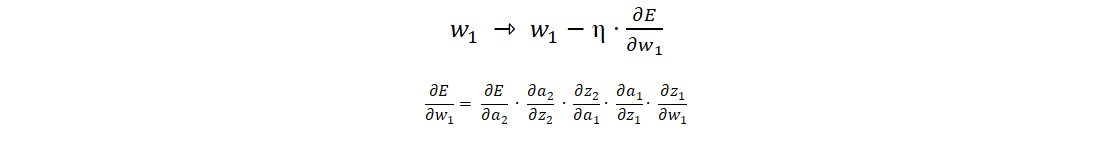

In [18]:
Image(filename='image_folder/update_w1.png')

In [19]:
weights[0] = weights[0] - lr * (-(T - a_2)) * elu_prime(1, a_2) * weights[1] * elu_prime(1, a_1) * x_1

print(f'Updated w\u2081 value is {weights[0]}')

Updated w₁ value is 0.141724489735


### Updating b<sub>1</sub>

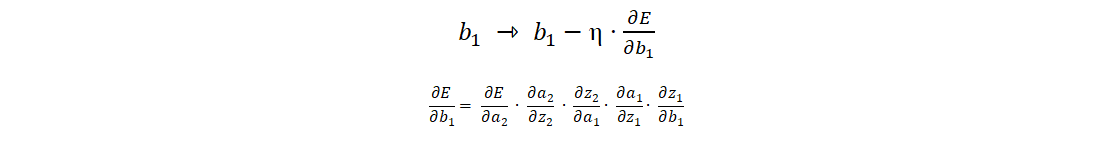

In [20]:
Image(filename='image_folder/update_b1.png')

In [21]:
biases[0] = biases[0] - lr * (-(T - a_2)) * elu_prime(1, a_2) * weights[1] * elu_prime(1, a_1) * 1

print(f'Updated b\u2081 value is {biases[0]}')

Updated b₁ value is 0.31724489735


Let's print out our updated biases and weights:

In [22]:
print(weights)
print(biases)
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2

[0.141724489735, 0.35259949999999995]
[0.31724489735, 0.4153]

w₁: 0.141724489735
w₂: 0.35259949999999995

b₁: 0.31724489735
b₂: 0.4153


## Creating Function to Make Forward and Back Propagation

In [23]:
def forw_backProp(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = elu(1, z_1)
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = elu(1, z_2)     
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1
        w_1 = w_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * 1        
        i+=1
        
        ## print(f'\nw\u2081: {w_1}') #  weight 1
        ## print(f'w\u2082: {w_2}') #  weight 2
        ## print(f'\nb\u2081: {b_1}') #  bias 1
        ## print(f'b\u2082: {b_2}') #  bias 2
        
        print(f'\nEpoch {i} - Error {E} - Output {a_2}')
        
    

In [24]:
forw_backProp(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)


Epoch 1 - Error 0.17213778125000007 - Output 0.8367500000000001

Epoch 2 - Error 0.03980645296800739 - Output 0.5321575906049929

Epoch 3 - Error 0.010595771488016185 - Output 0.3955731533492092

Epoch 4 - Error 0.0029673815806231024 - Output 0.3270374140352998

Epoch 5 - Error 0.0008501432951880522 - Output 0.2912345315285151

Epoch 6 - Error 0.00024630069744826106 - Output 0.2721946253605805

Epoch 7 - Error 7.176908753766118e-05 - Output 0.26198074184161074

Epoch 8 - Error 2.097615159576403e-05 - Output 0.2564770597643937

Epoch 9 - Error 6.14068564251488e-06 - Output 0.2535044787465513

Epoch 10 - Error 1.7992249490730348e-06 - Output 0.2518969580644142

Epoch 11 - Error 5.274212957225791e-07 - Output 0.2510270553010647

Epoch 12 - Error 1.5464641837764154e-07 - Output 0.2505561410223633

Epoch 13 - Error 4.5350447181383615e-08 - Output 0.25030116589176526

Epoch 14 - Error 1.3300117712330756e-08 - Output 0.250163095786042

Epoch 15 - Error 3.9007384349262156e-09 - Output 0.25008

## Creating Function to Plot Error in Forward and Back Propagation

In [25]:
def prop_Visual(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    import matplotlib.pyplot as plt
    
    epoch=[]
    error=[]
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = elu(1, z_1)
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = elu(1, z_2)      
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1
        w_1 = w_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * 1     
        error.append(E)
        epoch.append(i)        
        i+=1
    
    plt.plot(epoch, error)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()
   

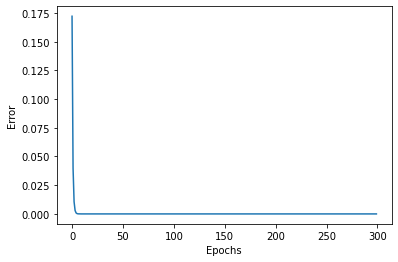

In [26]:
prop_Visual(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)

As we can see from the plot, our model working relatively great.

Tips:

**Small treshold : Slow convergence**

**Large treshold : Our error may not decrease on every iteration; may not converge.**

**Make sure that you are using treshold like 0.001, 0.01, 0.1 and etc.**